<b> A notebook for the classification of the MNIST fashion dataset.

I used Sequential Convolutional Neural Networks (CNN) model using Keras and tensorflow as a backend.



Result : |Training Accuracy | Dev(Validation) Accuracy| Testing Accuracy |
---------------------------------------------------------------------|
         | 92.78 %          | 91.47 %             | 92.00 %          |


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [3]:
keras.backend.image_dim_ordering()

'tf'

In [4]:
batch_size     = 32
nb_classes     = 10
nb_ephochs     = 50
img_rows, img_cols = 28,28
nb_filters     = 32
pool_size      = 2
kernel_size    = 3

In [5]:
if K.image_dim_ordering() == 'th':
    input_shape = (1,img_rows, img_cols)
else:
    input_shape = (img_rows,img_cols,1)

In [6]:
data_train = pd.read_csv('input_data/fashion-mnist_train.csv')
data_test = pd.read_csv('input_data/fashion-mnist_test.csv')

In [7]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
clothes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

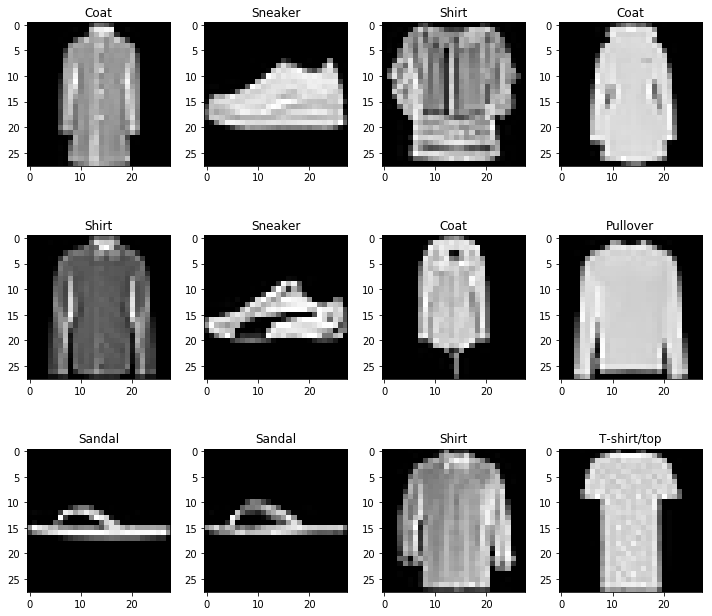

In [9]:
fig, axes = plt.subplots(3, 4,figsize=(10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = data_train.iloc[index, 1:].values.reshape((28, 28))
        obj = data_train.iloc[index, 0]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothes[obj])
        plt.tight_layout()

In [10]:
X = data_train.iloc[:,1:].values
y = data_train.iloc[:,0].values
y = to_categorical(y)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
X_test = data_test.iloc[:,1:].values
y_test = data_test.iloc[:,0]
y_test  = to_categorical(y_test)

## Reshaping Data +  Normalization 

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 784)
(12000, 784)
(10000, 784)


In [67]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train  / 255
X_val   = X_val   / 255
X_test  = X_test / 255

In [16]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
X_train.max(),X_val.max(), X_test.max()

(1.0, 1.0, 1.0)

In [18]:
X_train.min(),X_val.min(), X_test.min()

(0.0, 0.0, 0.0)

# Model Architecture

## Now we need to follow the following steps:
    
    1. Convolution 
    2. Max Pooling
    3. Convolution
    4. Max pooling
    5. Dropout
    6  Flattening
    7. Full Connection (Dense)
    8. Dropout
    9. Full Connection


In [19]:
model = Sequential()
model.add(Convolution2D(filters= nb_filters,kernel_size=(kernel_size,kernel_size),input_shape = input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

model.add(Convolution2D(filters=nb_filters, kernel_size=(kernel_size,kernel_size),activation='relu'))
model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(output_dim = 128 , activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(output_dim = nb_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.adam(), metrics = ['accuracy'])

C:\Users\agebresi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\agebresi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [21]:
import time
start_time = time.time()

training_history =model.fit(X_train,y_train,batch_size= batch_size, epochs = nb_ephochs, verbose=1, validation_data=(X_val, y_val))

training_time = time.time() - start_time
print(training_time)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 29s - loss: 0.6432 - acc: 0.7668 - val_loss: 0.4000 - val_acc: 0.8521
Epoch 2/50
48000/48000 [==============================] - 28s - loss: 0.4405 - acc: 0.8391 - val_loss: 0.3499 - val_acc: 0.8697
Epoch 3/50
48000/48000 [==============================] - 28s - loss: 0.3869 - acc: 0.8594 - val_loss: 0.3297 - val_acc: 0.8792
Epoch 4/50
48000/48000 [==============================] - 28s - loss: 0.3580 - acc: 0.8700 - val_loss: 0.2996 - val_acc: 0.8909
Epoch 5/50
48000/48000 [==============================] - 28s - loss: 0.3310 - acc: 0.8764 - val_loss: 0.2853 - val_acc: 0.8928
Epoch 6/50
48000/48000 [==============================] - 28s - loss: 0.3204 - acc: 0.8833 - val_loss: 0.2917 - val_acc: 0.8925
Epoch 7/50
48000/48000 [==============================] - 28s - loss: 0.3085 - acc: 0.8870 - val_loss: 0.2756 - val_acc: 0.8974
Epoch 8/50
48000/48000 [==============================

In [25]:
print(type(training_history))

<class 'keras.callbacks.History'>


In [26]:
training_time

1465.7929389476776

In [30]:
training_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [31]:
training_accuracy   = training_history.history['acc']
validation_accuracy = training_history.history['val_acc']

training_loss       = training_history.history['loss']
validation_loss     = training_history.history['val_loss']


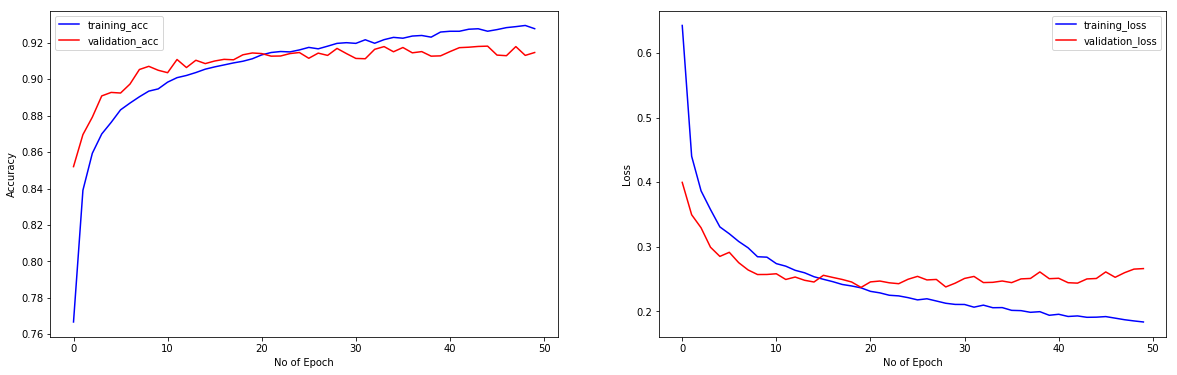

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

axes[0].plot(training_accuracy,'b')
axes[0].plot(validation_accuracy,'r')
axes[0].legend(['training_acc', 'validation_acc'])
axes[0].set_xlabel('No of Epoch')
axes[0].set_ylabel('Accuracy')

axes[1].plot(training_loss,'b')
axes[1].plot(validation_loss,'r')
axes[1].legend(['training_loss', 'validation_loss'])
axes[1].set_xlabel('No of Epoch')
axes[1].set_ylabel('Loss')

In [62]:
print(training_time // 60,training_time/60)

24.0 24.429882315794625


# Model Evaluation

In [69]:
score = model.evaluate(X_test, y_test, verbose=1)

 9888/10000 [============================>.] - ETA: 0s

In [71]:
score

[0.24394725968837738, 0.92000000000000004]

In [78]:
print('Test loss: {}  \n Test Accuracy: {} %'.format(score[0],score[1]*100))


Test loss: 0.24394725968837738  
 Test Accuracy: 92.0 %
